### 🏷️ Metadata Description

| Column Name       | Description                                                  |
|-------------------|--------------------------------------------------------------|
| `id`              | Unique identifier for the house                              |
| `date`            | Date the house was sold (e.g., 20141013T000000)              |
| `price`           | Sale price (target variable)                                 |
| `bedrooms`        | Number of bedrooms                                           |
| `bathrooms`       | Number of bathrooms (can be fractional like 1.5)             |
| `sqft_living`     | Square footage of interior living space                      |
| `floors`          | Number of floors in the house                                |
| `waterfront`      | Binary indicator (1 = waterfront, 0 = no waterfront)         |
| `view`            | Quality of the view (0 to 4 scale)                           |
| `condition`       | Condition of the house (1 to 5 scale)                        |
| `grade`           | Overall grade (1 to 13) based on construction and design     |
| `yr_built`        | Year the house was originally built                          |
| `yr_renovated`    | Year the house was renovated (0 if never renovated)          |
| `zipcode`         | Zip/postal code of the house location                        |
| `lat`             | Latitude coordinate                                          |
| `long`            | Longitude coordinate                                         |
| `sqft_living15`   | Living area of the 15 nearest neighbors                      |
| `sqft_lot15`      | Lot size of the 15 nearest neighbors                         |
| `sqft_lot`        | Lot size of the house                                        |
| `sqft_above`      | Square footage of house above ground                         |
| `sqft_basement`   | Square footage of the basement                               |


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
import streamlit as st
import joblib


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mohamadmoselhy/Data-Science-Projects/main/LinearRegression/DataSet/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [6]:
df.columns = df.columns.str.lower().str.strip()  # Change column headers to lowercase
df = df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22712\2883634418.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)


In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013t000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209t000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225t000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209t000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218t000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521t000000,360000.0,3,2.50,1530,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,1131,1530,0
21609,6600060120,20150223t000000,400000.0,4,2.50,2310,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,5813,2310,0
21610,1523300141,20140623t000000,402101.0,2,0.75,1020,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,1350,1020,0
21611,291310100,20150116t000000,400000.0,3,2.50,1600,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2388,1600,0


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

In [10]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement


In [11]:
columns_to_drop = ['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop_existing, inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  sqft_lot       21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,1.510697e+04,1788.390691,291.509045
std,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,4.142051e+04,828.090978,442.575043
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,5.200000e+02,290.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,5.040000e+03,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,7.618000e+03,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,1.068800e+04,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,1.651359e+06,9410.000000,4820.000000


In [14]:
# Display rows where 'bedrooms' is greater than 10
filtered_df = df[df['bedrooms'] > 6]

# Show the rows and count them
print(filtered_df)


           price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
556    1950000.0         7       3.50         4640     2.0           0     1   
1135    420000.0         7       3.00         2940     1.0           0     0   
1241    350000.0         7       3.00         2800     1.0           0     2   
1660    490000.0         8       5.00         2800     2.0           0     0   
3721    884900.0         7       4.75         5370     1.5           0     0   
...          ...       ...        ...          ...     ...         ...   ...   
18823   539000.0         7       2.25         2620     2.0           0     0   
18975  1240000.0         7       5.50         6630     2.0           0     0   
19254   660000.0        10       3.00         2920     2.0           0     0   
19302   575000.0         8       3.00         3840     1.0           0     0   
19327   824000.0         7       4.25         3670     2.0           0     1   

       condition  grade  yr_built  sqft

In [15]:
df = df[(df['bedrooms'] <= 6) | (df['bedrooms'] == 0)]

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,sqft_lot,sqft_above,sqft_basement
count,2.155100e+04,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,2.155100e+04,21551.000000,21551.000000
mean,5.389751e+05,3.357431,2.110331,2074.802237,1.493573,0.007563,0.233864,3.409308,7.655236,1971.044499,1.510500e+04,1785.039581,289.762656
std,3.652039e+05,0.879087,0.763482,910.036434,0.539801,0.086641,0.765719,0.650629,1.174130,29.358078,4.142890e+04,823.582445,439.884377
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,5.200000e+02,290.000000,0.000000
25%,3.210000e+05,3.000000,1.500000,1420.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,5.040000e+03,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,7.615000e+03,1560.000000,0.000000
75%,6.430000e+05,4.000000,2.500000,2540.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,1.067600e+04,2210.000000,560.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,1.651359e+06,8860.000000,4820.000000


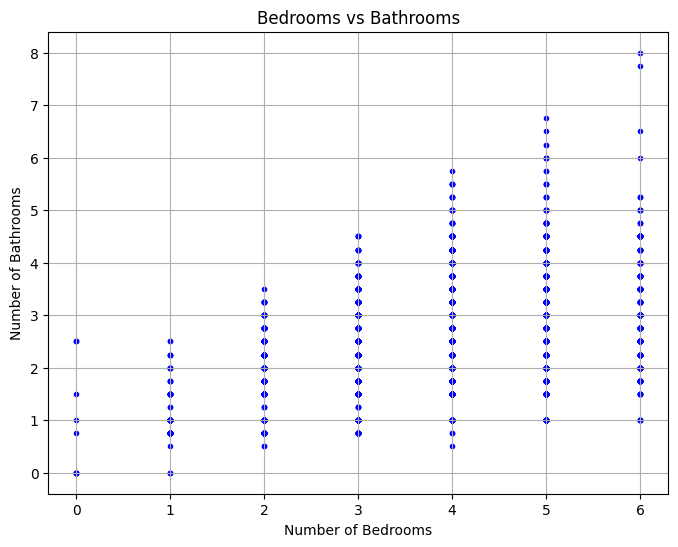

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['bathrooms'], color='blue', marker='.')

# Labeling the axes and the title
plt.title('Bedrooms vs Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')

# Show the plot
plt.grid(True)
plt.show()

In [18]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: 1 if x < 1 else round(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22712\2810281621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = df['bathrooms'].apply(lambda x: 1 if x < 1 else round(x))


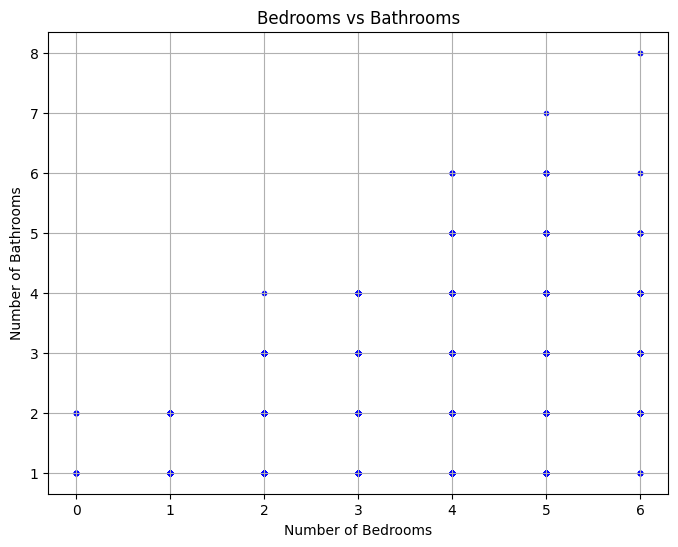

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['bathrooms'], color='blue', marker='.')

# Labeling the axes and the title
plt.title('Bedrooms vs Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')

# Show the plot
plt.grid(True)
plt.show()

In [20]:
df['floors'] = df['floors'].apply(lambda x: 1 if x < 1 else round(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22712\883912572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floors'] = df['floors'].apply(lambda x: 1 if x < 1 else round(x))


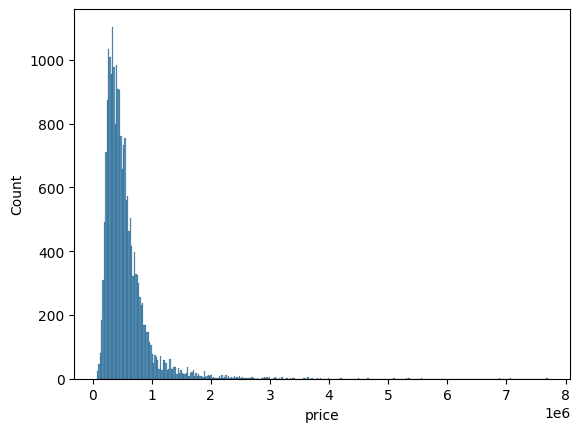

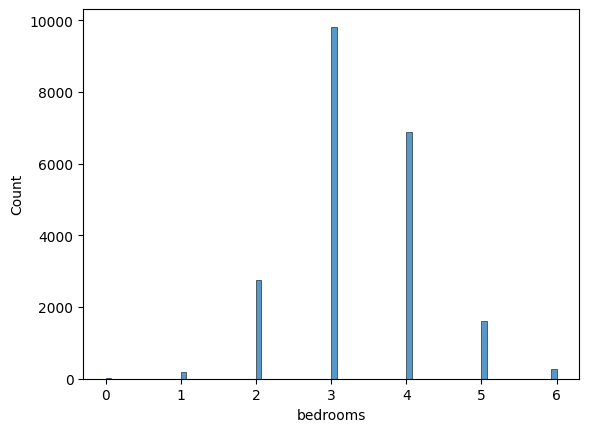

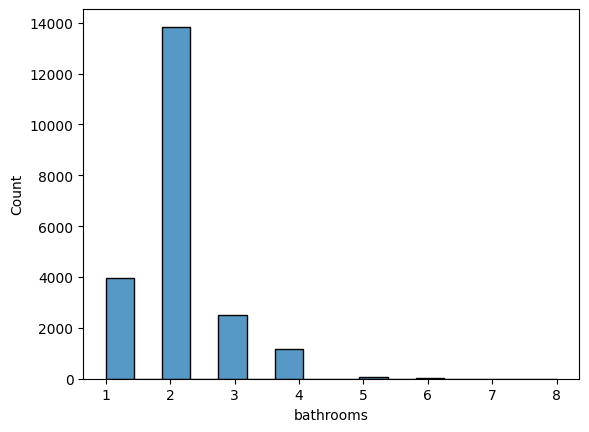

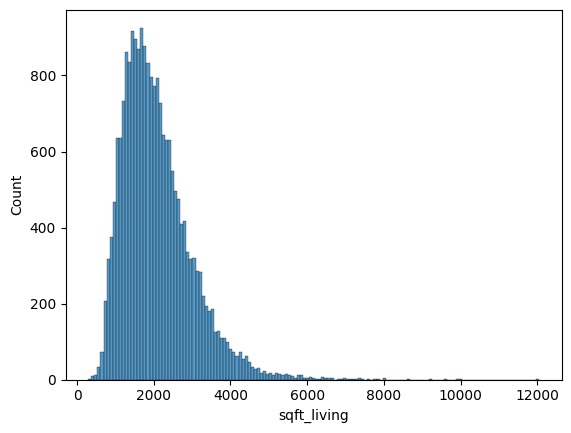

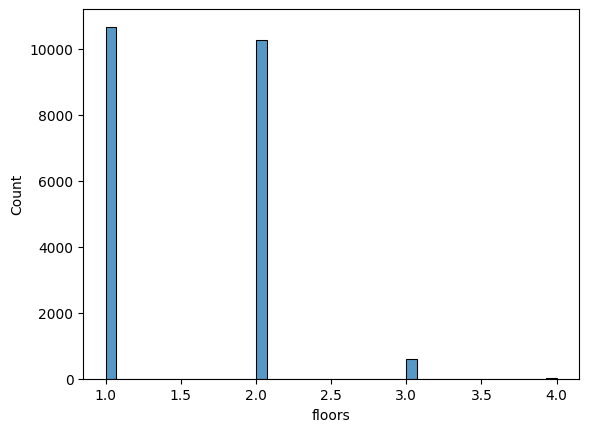

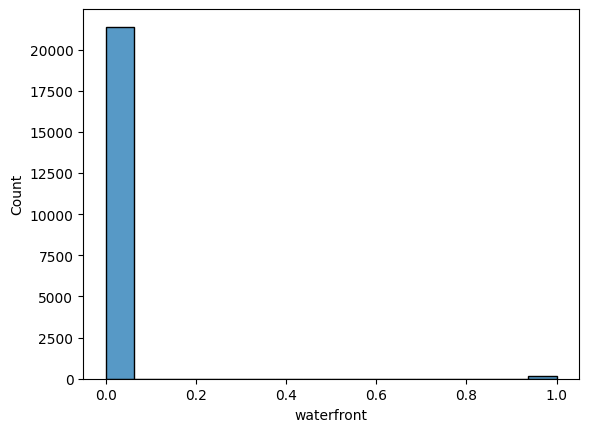

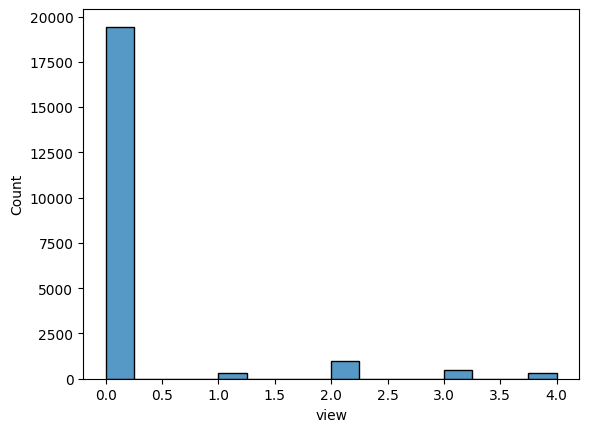

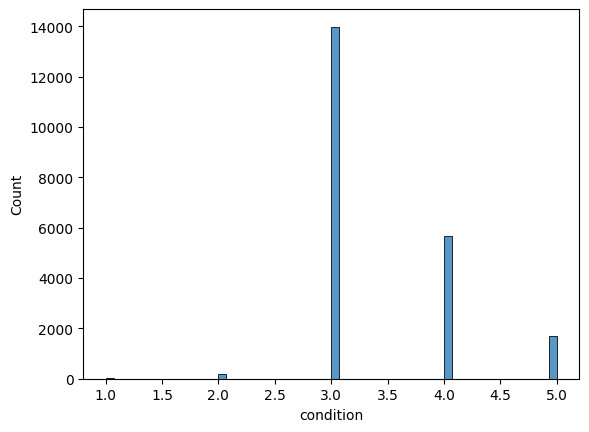

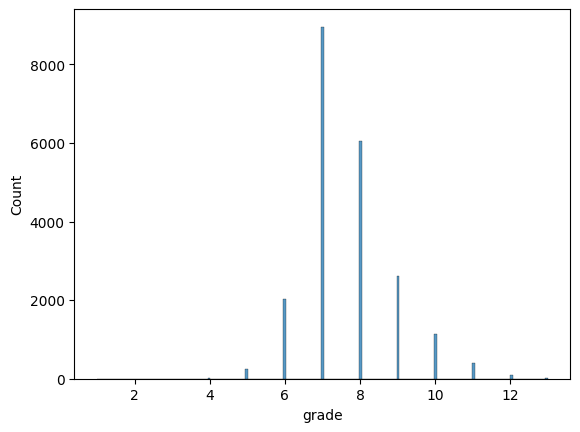

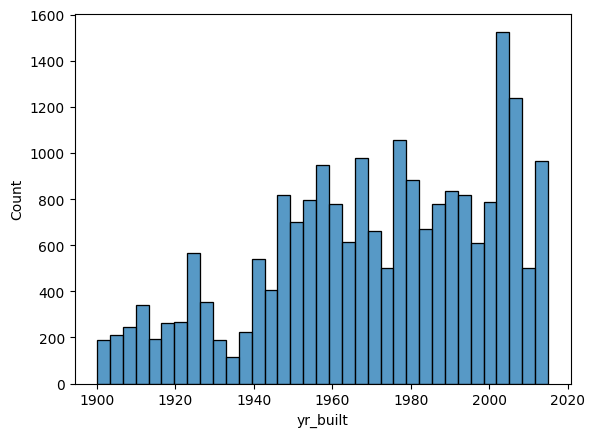

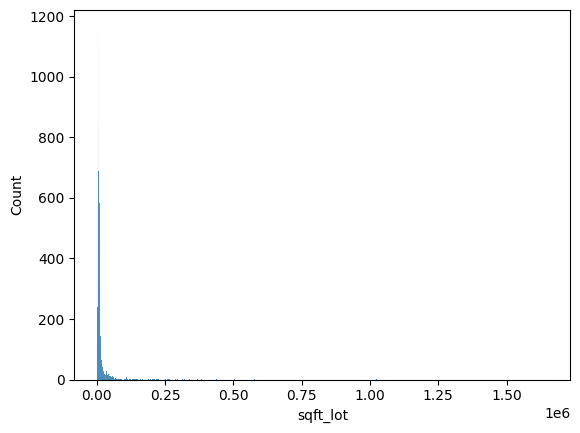

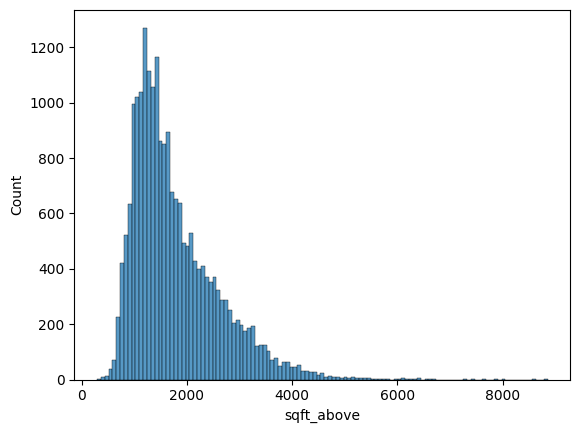

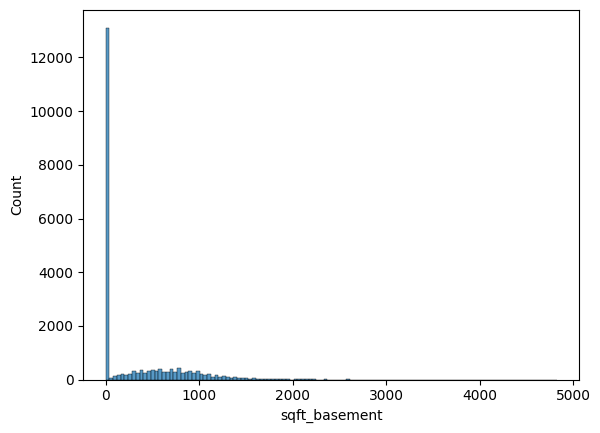

In [21]:
for col in df.columns:
    sns.histplot(data=df,x=col)
    plt.show()

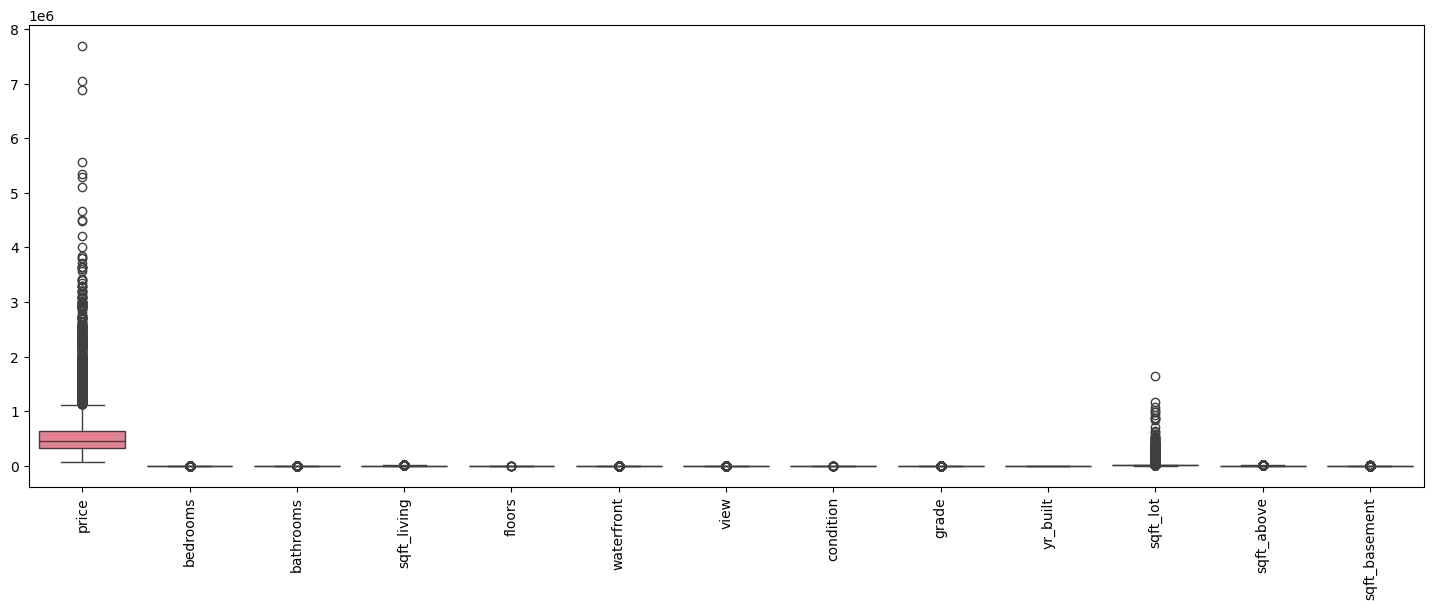

In [22]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [23]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

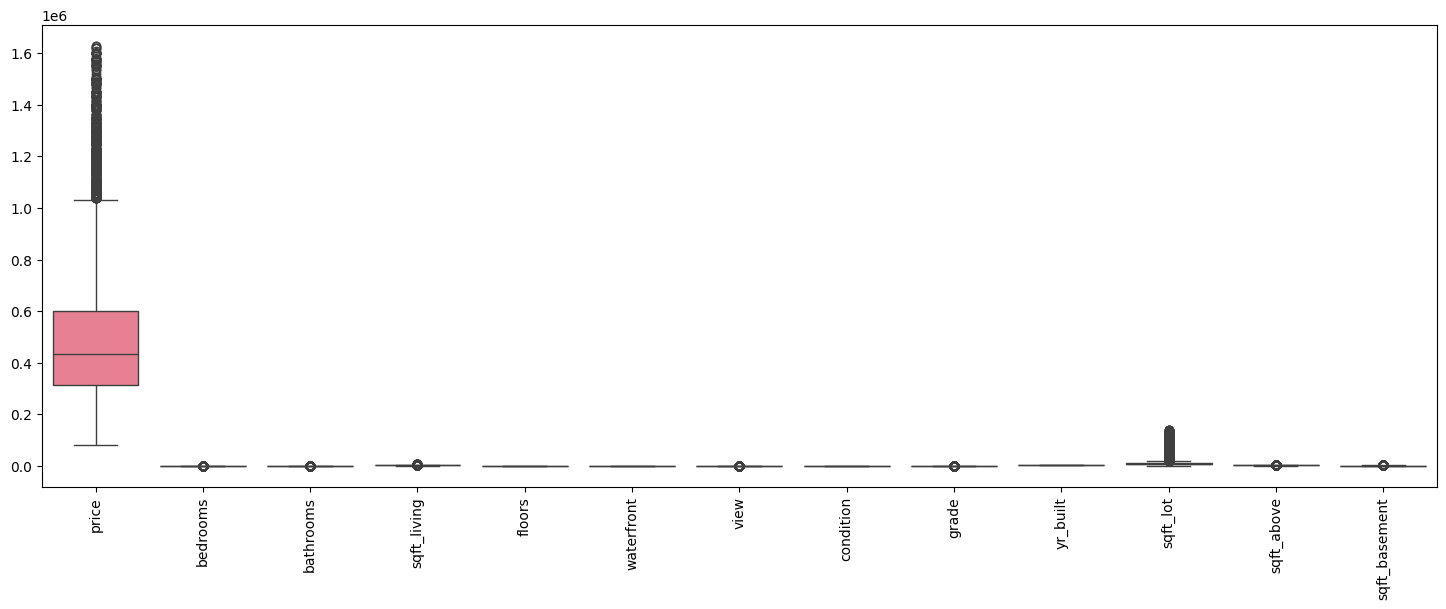

In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.shape

(19635, 13)

In [28]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

In [32]:
px.scatter(data_frame=df,x='bedrooms',y='price',trendline='ols',hover_name='bedrooms')

In [34]:
x = df.drop('price', axis=1)
y = df['price']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

In [36]:
MySclaer=StandardScaler()
x_train=MySclaer.fit_transform(x_train)
x_test=MySclaer.transform(x_test)

In [37]:
print(x_train)
print("====================")
print(x_test)

[[ 0.86834147  3.02465945  1.78124757 ... -0.40304598  1.38071912
   0.89829159]
 [-0.3598653  -1.46658077 -0.68162351 ... -0.36722671 -0.35478173
  -0.66306152]
 [-0.3598653  -1.46658077 -0.93691293 ...  0.63694539 -0.62264945
  -0.66306152]
 ...
 [-1.58807206  0.0304993  -0.46664295 ...  4.16895668 -0.12920892
  -0.66306152]
 [-1.58807206  0.0304993  -1.03096693 ... -0.6028636  -0.72133756
  -0.66306152]
 [ 0.86834147  1.52757937  0.44702445 ... -0.22703085 -0.49576474
   1.7749317 ]]
[[ 0.86834147  0.0304993   1.10540242 ... -0.35906146  1.5202923
  -0.66306152]
 [-0.3598653   0.0304993  -1.11158464 ... -0.20084042 -1.17248319
   0.01127703]
 [-0.3598653   0.0304993  -0.91004036 ... -0.2479832  -0.59445285
  -0.66306152]
 ...
 [-0.3598653  -1.46658077 -0.89660407 ... -0.10378175 -0.58035455
  -0.66306152]
 [-1.58807206  0.0304993  -0.93691293 ... -0.20546226 -0.62264945
  -0.66306152]
 [ 0.86834147  0.0304993   1.50849098 ... -0.30159656  1.94324133
  -0.66306152]]


In [38]:
LinearRegMod=LinearRegression()

In [40]:
LinearRegMod.fit(x_train,y_train)

LinearRegression()

In [41]:
LinearRegMod.intercept_,LinearRegMod.coef_

(np.float64(483888.35346332943),
 array([-1.90420786e+04,  2.35059397e+04,  4.47346233e+04,  2.15657407e+04,
         4.36557457e-11,  1.51345384e+04,  1.21789128e+04,  1.19122350e+05,
        -8.26139460e+04, -8.76559814e+03,  3.33156002e+04,  2.50619470e+04]))

In [42]:
y_predict=LinearRegMod.predict(x_test)

In [44]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

MSE: 23343155998.18
MAE: 113138.27
R2 Score: 0.58


In [53]:
def get_user_input():
    data = {}

    fields = [
       'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'sqft_lot', 'sqft_above',
       'sqft_basement'
    ]

    for field in fields:
        while True:
            try:
                value = float(input(f"Enter value for {field.replace('_', ' ').title()}: "))
                data[field] = value
                break
            except ValueError:
                print("Please enter a valid number.")
    return data


In [54]:
get_user_input=get_user_input()

In [67]:
get_user_input

{'bedrooms': 2.0,
 'bathrooms': 1.0,
 'sqft_living': 120.0,
 'floors': 2.0,
 'waterfront': 0.0,
 'view': 5.0,
 'condition': 5.0,
 'grade': 7.0,
 'yr_built': 2025.0,
 'sqft_lot': 130.0,
 'sqft_above': 160.0,
 'sqft_basement': 0.0}

In [68]:
def predict(user_input):
    # Convert dict to 2D array if needed
    input_array = np.array([list(user_input.values())])
    input_array=MySclaer.transform(input_array)
    result = LinearRegMod.predict(input_array)
    return result

In [69]:
user_input_data = get_user_input  # Assuming get_user_input is a dictionary or an appropriate data structure
prediction_result = predict(user_input_data)

# If the result is a single value within an array, extract it:
scalar_result = prediction_result[0] if isinstance(prediction_result, np.ndarray) else prediction_result

# Formatting the prediction result with $ and commas
formatted_result = "${:,.2f}".format(scalar_result)

print("Prediction result:", formatted_result)

Prediction result: $302,001.18


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [83]:
joblib.dump(LinearRegMod, 'model.pkl')
joblib.dump(MySclaer, 'scaler.pkl')

['scaler.pkl']

In [81]:

# Assuming your model and prediction function are already available
# For example: from your_model_file import model, predict_function

# Title of the web app
st.title("Real Estate Price Prediction")

# Collect input data from user
st.subheader("Enter the property details:")

# Create inputs for all required features
bedrooms = st.number_input("Number of Bedrooms:", min_value=1, max_value=50, value=3)
bathrooms = st.number_input("Number of Bathrooms:", min_value=1, max_value=10, value=2)
sqft_living = st.number_input("Square Footage of Living Area (sqft):", min_value=200, max_value=10000, value=2000)
floors = st.number_input("Number of Floors:", min_value=1, max_value=5, value=2)
waterfront = st.selectbox("Waterfront (1 = Yes, 0 = No):", [0, 1])
view = st.selectbox("View Quality (0 to 4):", [0, 1, 2, 3, 4])
condition = st.selectbox("Condition (1 to 5):", [1, 2, 3, 4, 5])
grade = st.selectbox("Grade (1 to 13):", [i for i in range(1, 14)])
yr_built = st.number_input("Year Built:", min_value=1900, max_value=2025, value=2000)
sqft_lot = st.number_input("Lot Size (sqft):", min_value=500, max_value=100000, value=5000)
sqft_above = st.number_input("Square Footage of Area Above Ground (sqft):", min_value=100, max_value=10000, value=1500)
sqft_basement = st.number_input("Square Footage of Basement (sqft):", min_value=0, max_value=5000, value=500)

# Create the feature array for prediction
user_input = {
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'sqft_living': sqft_living,
    'floors': floors,
    'waterfront': waterfront,
    'view': view,
    'condition': condition,
    'grade': grade,
    'yr_built': yr_built,
    'sqft_lot': sqft_lot,
    'sqft_above': sqft_above,
    'sqft_basement': sqft_basement
}

# Make a prediction based on user input
# Assuming you have a prediction function (e.g., model.predict())
prediction = predict(user_input)  # Replace `predict()` with your actual prediction method

# Display the prediction result
st.subheader("Prediction Result:")
st.write(f"The estimated price for a property with the following details:")
st.write(f"- {bedrooms} bedrooms")
st.write(f"- {bathrooms} bathrooms")
st.write(f"- {sqft_living} sqft of living area")
st.write(f"- {floors} floors")
st.write(f"- Waterfront: {'Yes' if waterfront == 1 else 'No'}")
st.write(f"- View Quality: {view}")
st.write(f"- Condition: {condition}")
st.write(f"- Grade: {grade}")
st.write(f"- Built in {yr_built}")
st.write(f"- Lot Size: {sqft_lot} sqft")
st.write(f"- {sqft_above} sqft of area above ground")
st.write(f"- {sqft_basement} sqft of basement")

st.write(f"The estimated price of this property is: ${prediction[0]:,.2f}")


2025-04-06 02:22:14.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 02:22:14.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar